<a href="https://colab.research.google.com/github/Gokul3103/Naan_Mudhalavan_Final_Project/blob/main/Digit_Recognizor_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


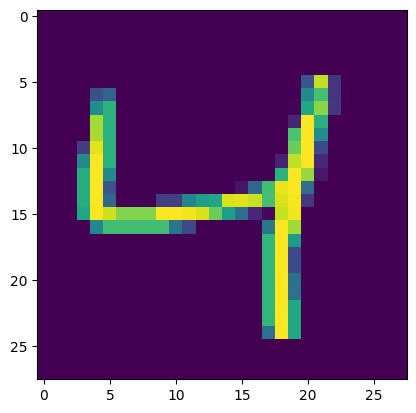

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2845 - accuracy: 0.9194 - val_loss: 0.1517 - val_accuracy: 0.9567
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1277 - accuracy: 0.9623 - val_loss: 0.1255 - val_accuracy: 0.9624
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.1182 - val_accuracy: 0.9641
Epoch 4/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0909 - val_accuracy: 0.9730
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0504 - accuracy: 0.9852 - val_loss: 0.1008 - val_accuracy: 0.9702
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.0795 - val_accuracy: 0.9763
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0864 - val_accuracy:

In [11]:
y_pb = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pd = y_pb.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pd)

0.9767

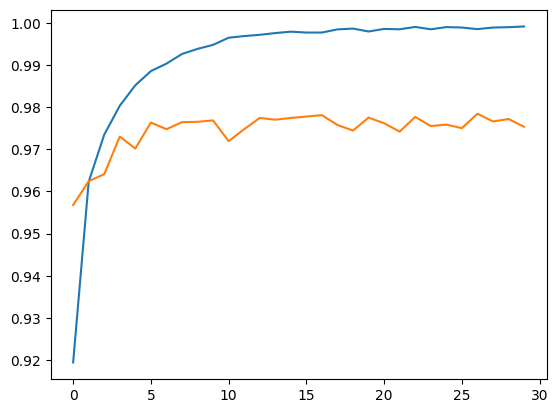

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

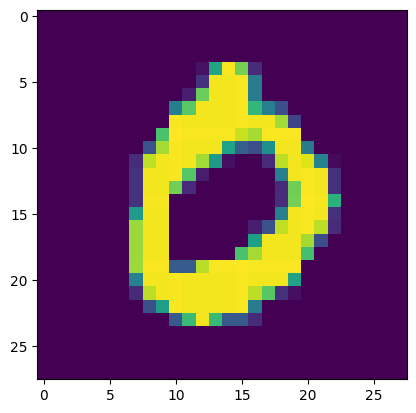

In [15]:
plt.imshow(X_test[3])

In [16]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([0])

In [17]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_values = test.values

In [18]:
print(test_values.shape)
print(X_test.shape)

(28000, 784)
(10000, 28, 28)


In [19]:
test_values_reshaped = test_values.reshape(28000, 28, 28)
test_values_reshaped.shape

(28000, 28, 28)

In [20]:
test_out = model.predict(test_values_reshaped)

875/875 [==============================] - 2s 3ms/step


In [21]:
y =test_out.argmax(axis=1)
submission = pd.DataFrame(y, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv('/kaggle/working/submission.csv')
print('Submission completed!')

Submission completed!
